In [ ]:
import pandas as pd
from matplotlib import pyplot
import statistics
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
os.chdir('C:/Users/jatin/OneDrive/Desktop')

In [3]:
df = pd.read_csv("health care diabetes.csv")
#df2 = pd.read_csv("train.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
null = df.isnull().sum().sort_values(ascending=False)
#First sum and order all null values for each variable
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False) 
dataType = df.dtypes
missing_variables = pd.concat([null, percent,dataType], axis=1, keys=['Total', 'percent','Data Type'])
missing_variables_test = missing_variables.head(19)

In [8]:
missing_variables_test

,Total,percent,Data Type
Pregnancies,0,0.0,int64
Glucose,0,0.0,int64
BloodPressure,0,0.0,int64
SkinThickness,0,0.0,int64
Insulin,0,0.0,int64
BMI,0,0.0,float64
DiabetesPedigreeFunction,0,0.0,float64
Age,0,0.0,int64
Outcome,0,0.0,int64


Be very careful in some cases the NULL values, will be in terms of 0 in the data : THat is a god damm trip hence use this below flow"

In [9]:
df = df.replace(0, pd.np.nan)


In [10]:
df.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   268 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [12]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']
for col in columns:
    df[col].fillna(int(df[col].mean()), inplace=True)

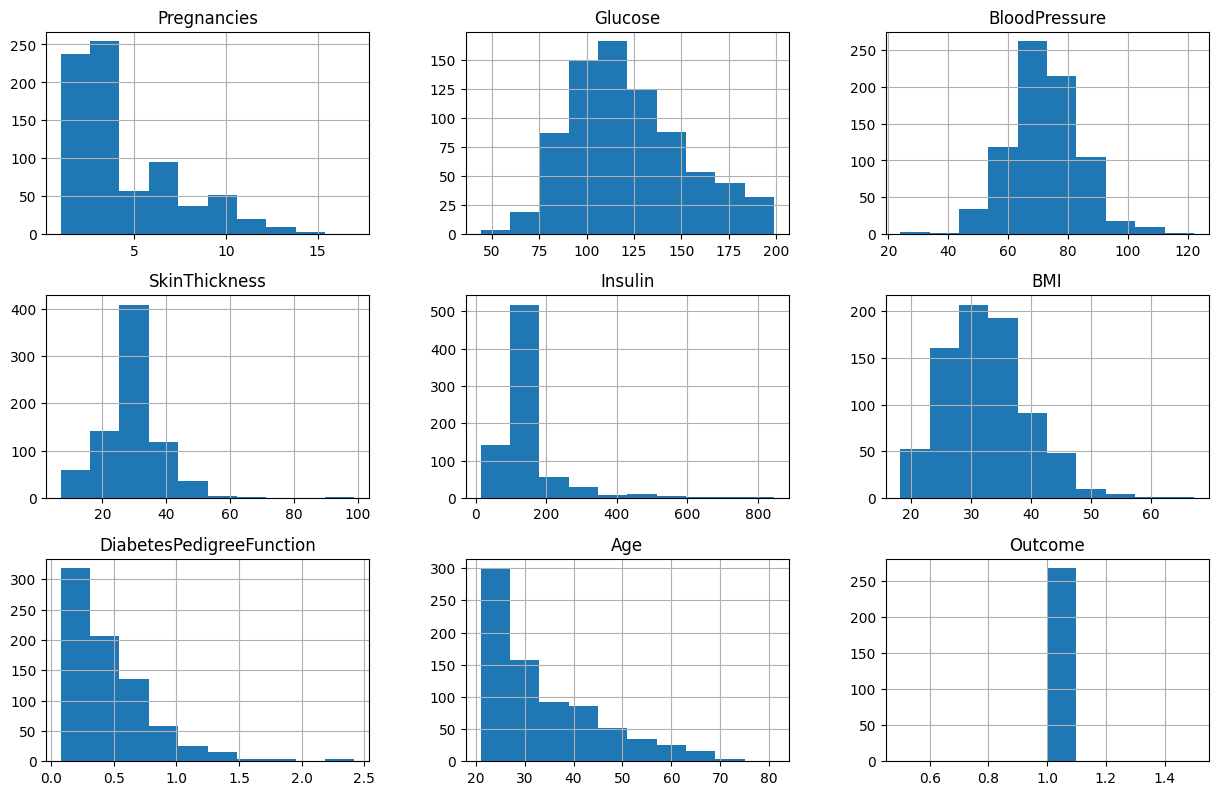

In [13]:
df.hist(figsize=(15,30),layout=(9,3))
plt.show()

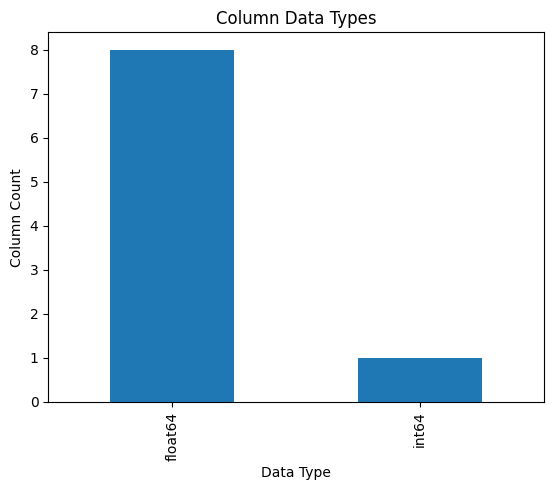

In [14]:
dtype_counts = df.dtypes.value_counts()

# create bar chart
dtype_counts.plot(kind='bar')
plt.xlabel('Data Type')
plt.ylabel('Column Count')
plt.title('Column Data Types')

# show chart
plt.show()

In [15]:

# replace NaN values with 0
df['Outcome'] = df['Outcome'].fillna(0)

# replace 1.0 values with 1
df['Outcome'] = df['Outcome'].replace(1.0, 1)


In [16]:
df["Outcome"].value_counts(normalize=True)*100

0.0    65.104167
1.0    34.895833
Name: Outcome, dtype: float64

Text(0.5, 1.0, ' Glucose Vartion over Pregnancies that translates to Outcome ')

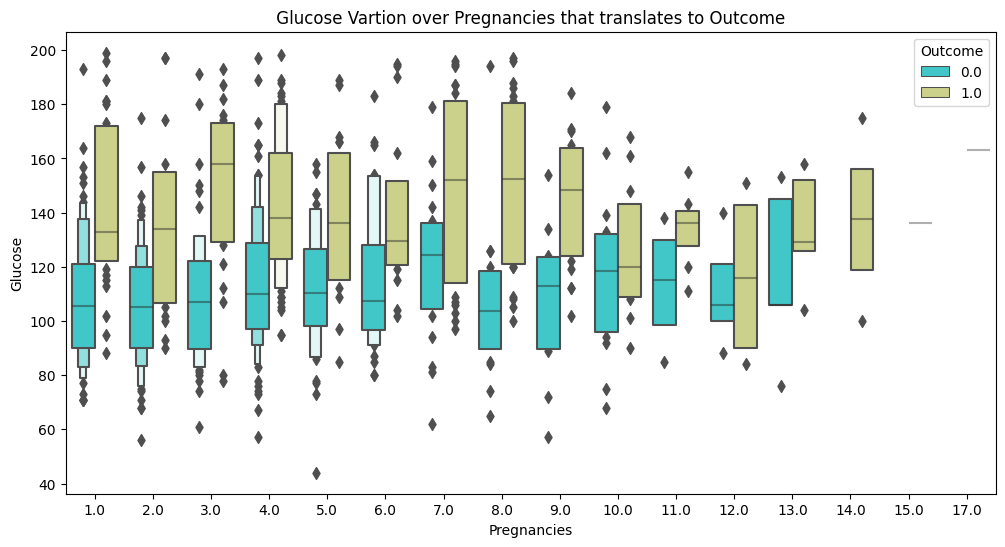

In [17]:
plt.figure(figsize=(12,6))

sns.boxenplot(x='Pregnancies',y='Glucose',data=df, palette='rainbow', hue='Outcome')

plt.title(" Glucose Vartion over Pregnancies that translates to Outcome ")

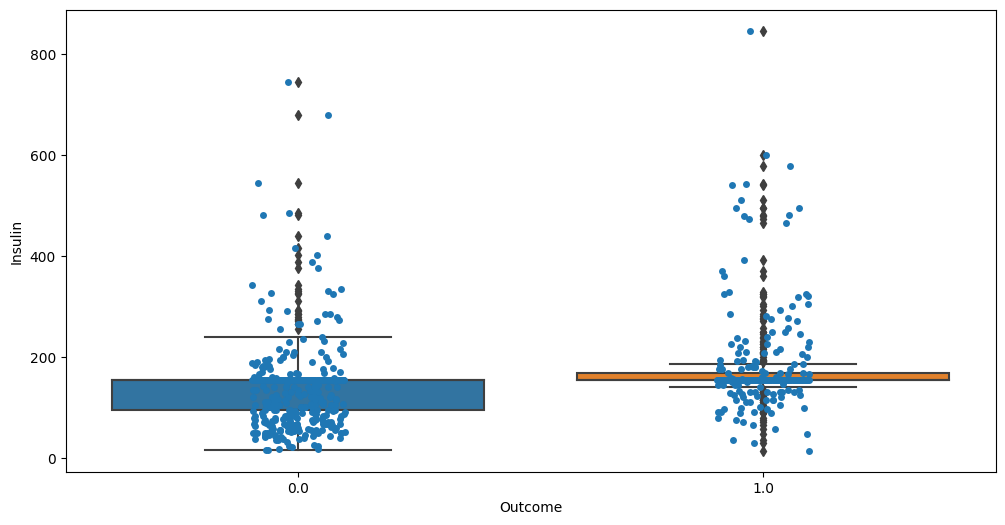

In [18]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="Outcome", y="Insulin", data=df)
ax = sns.stripplot(x="Outcome", y="Insulin", data=df, jitter=True, edgecolor="gray")

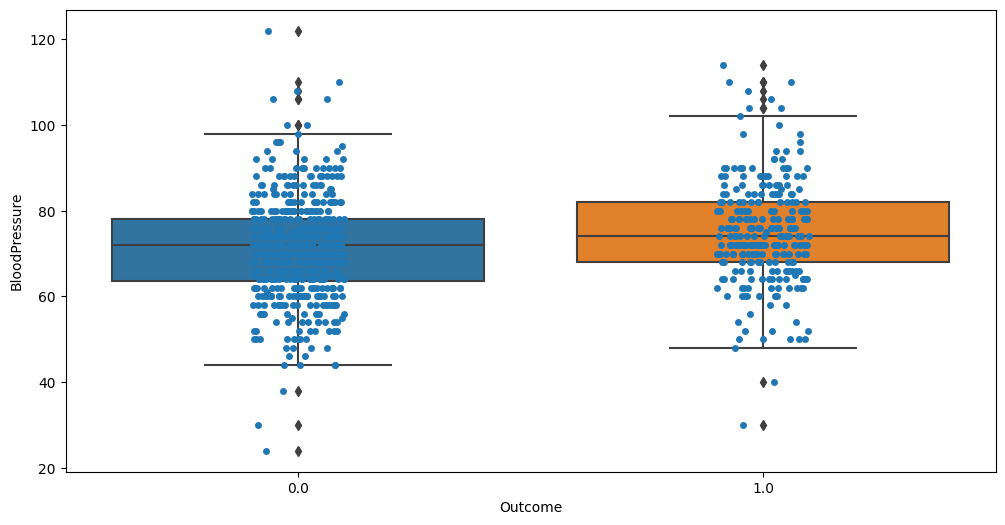

In [19]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="Outcome", y="BloodPressure", data=df)
ax = sns.stripplot(x="Outcome", y="BloodPressure", data=df, jitter=True, edgecolor="gray")

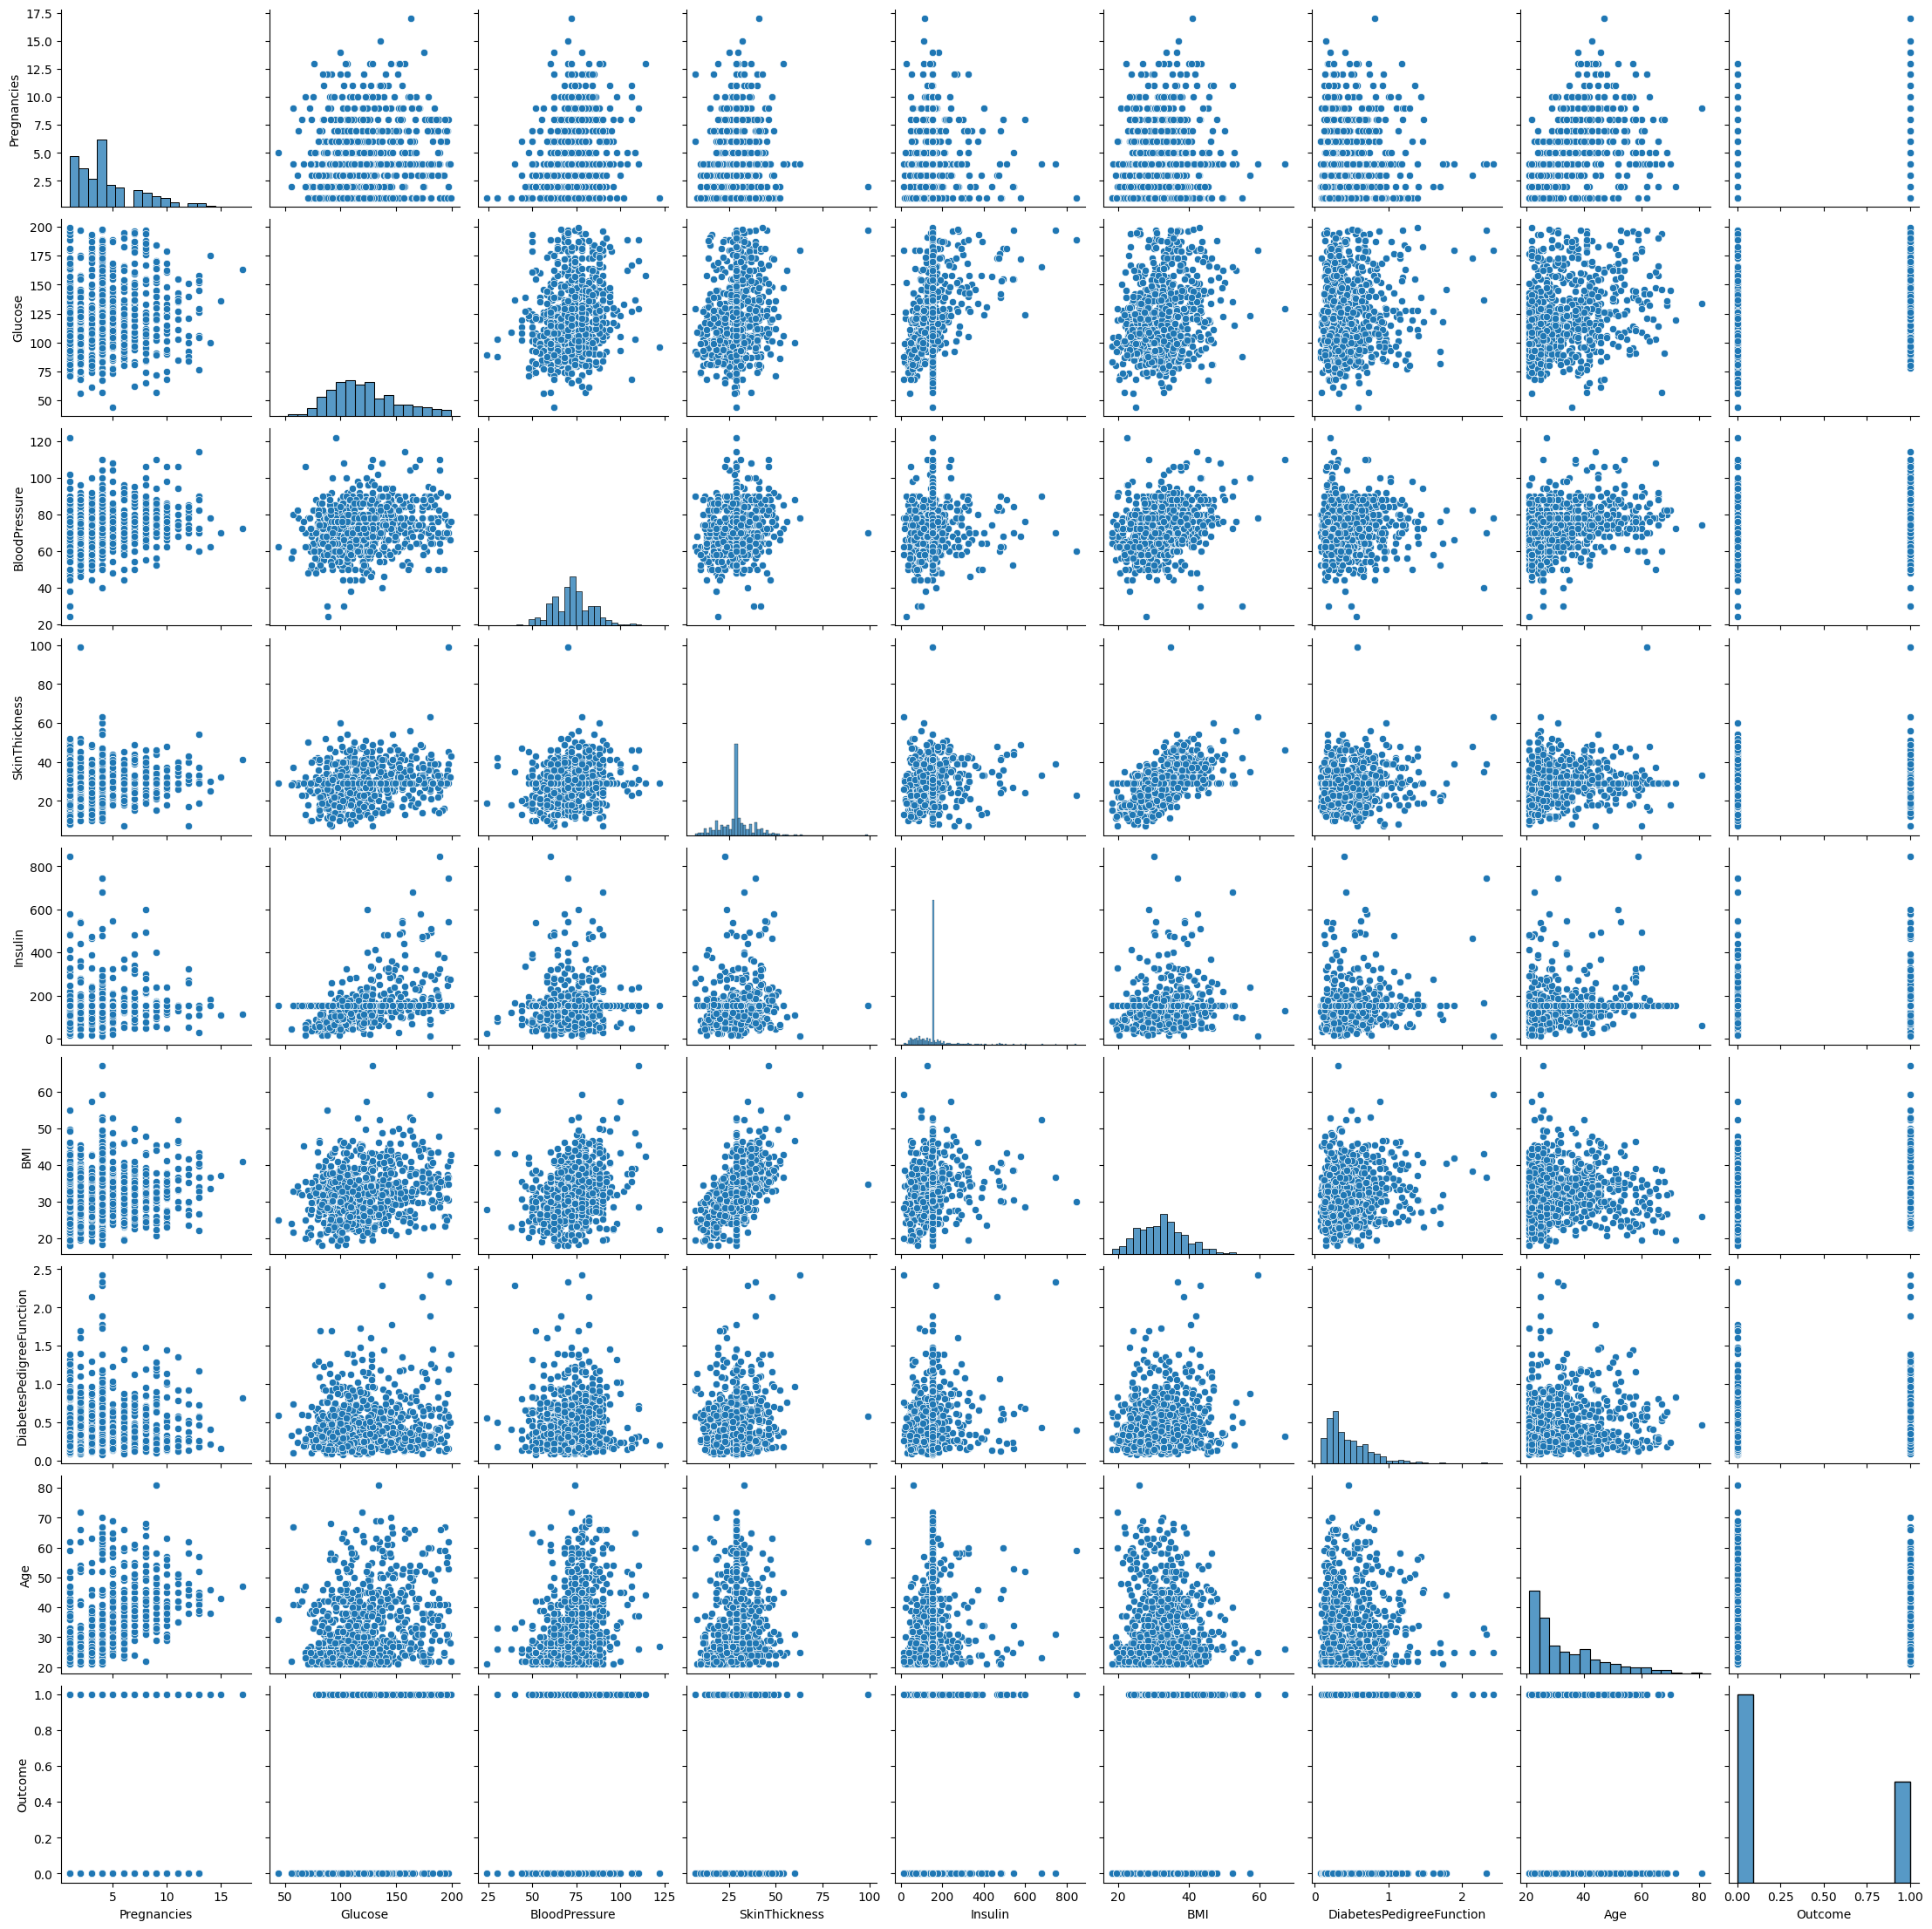

In [20]:
sns.pairplot(df)

<AxesSubplot: >

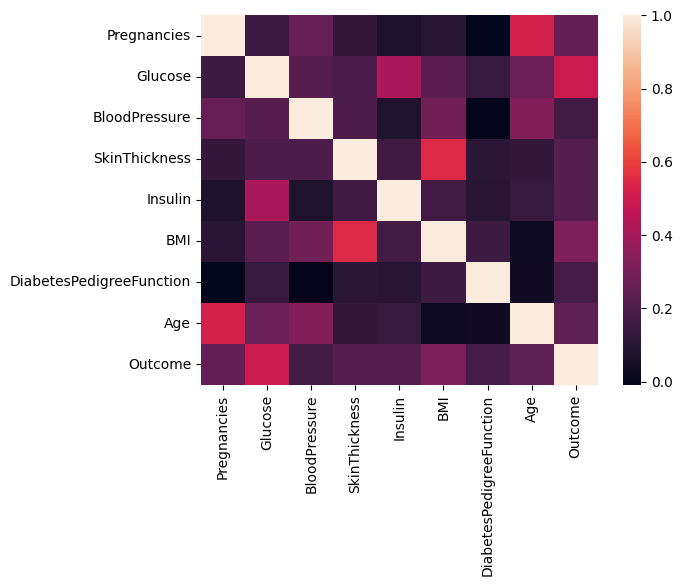

In [21]:
sns.heatmap(df.corr())

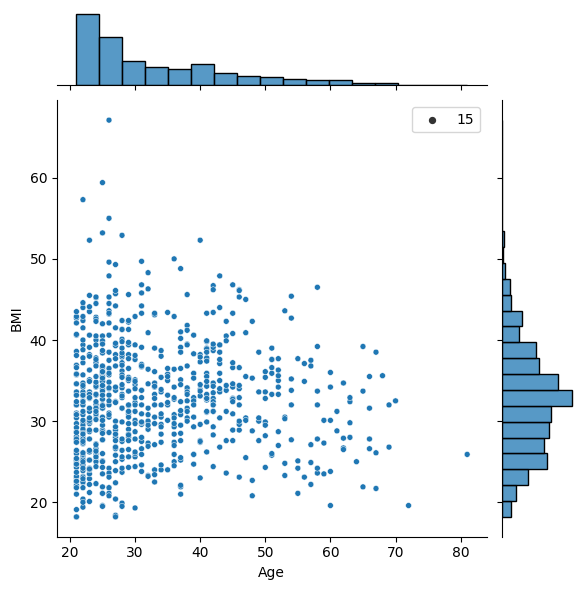

In [22]:
sns.jointplot(x="Age", y="BMI", data=df, size=15)

In [23]:
target = df['Outcome']
df = df.drop(['Outcome'],axis=1)

In [24]:
#pip install imbalanced-learn

Before Sampling


<AxesSubplot: >

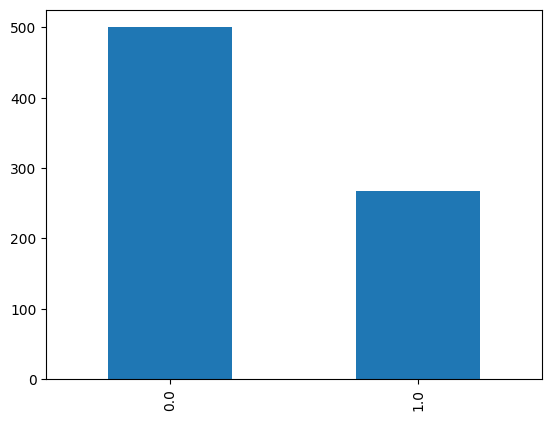

In [25]:
print("Before Sampling")

target.value_counts().plot(kind ='bar')

Sir told to check with and without SMOTE method 

In [26]:
#from imblearn.over_sampling import SMOTE


#df, target = SMOTE().fit_resample(df, target)

Before Sampling


<AxesSubplot: >

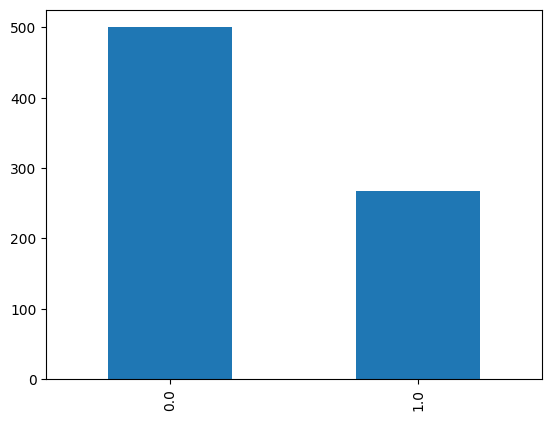

In [27]:
print("Before Sampling")

target.value_counts().plot(kind ='bar')

In [28]:
from sklearn import model_selection
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [29]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
names = []
results = []

In [30]:
#The 10-fold cross validation procedure is used to evaluate each algorithm,same random seed to ensure that the same splits happen
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=123)
    cv_results = model_selection.cross_val_score(model, df, target, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticRegression: 0.768353 (0.047701)
classifier: 0.707006 (0.062099)
RandomForestClassifier: 0.764320 (0.047579)


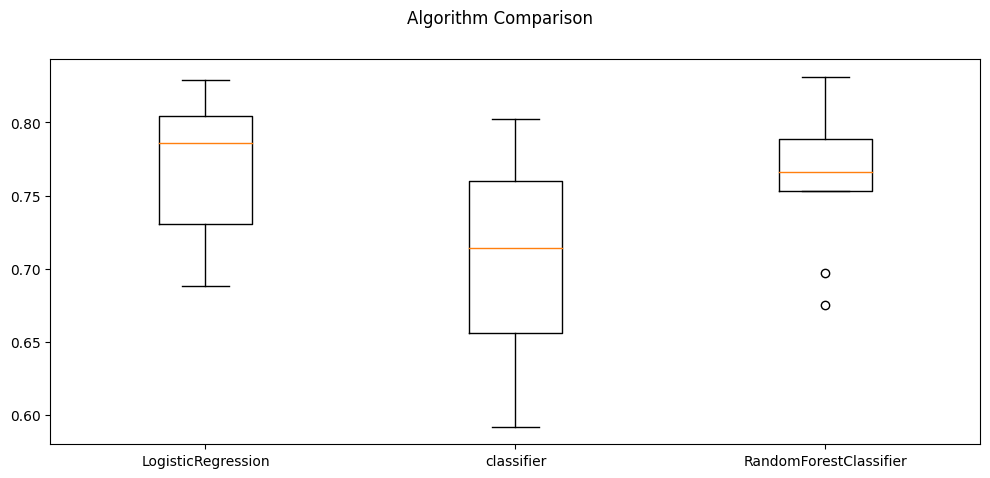

In [31]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()